ECG Breathing Rate Notebook
--------------------------

This notebook was created 2019-08-31 to look at the initial data collected for the CIMVHR study.

> Using machine learning to investigate sympathetic activation of the autonomic nervous system (SAANS) during the treatment of mild traumatic brain injury, chronic pain, and post-traumatic stress disorder.

Download all ECG files from the server to an `ECG/` directory. The list of files that have been considered is shown in `files`. Add or modify files to this list, as required. Select which file to load from `files` by setting `FILE_INDEX`.

In [127]:
%load_ext autoreload
%autoreload 2
import stress
import math
import numpy as np
from matplotlib import pyplot as plt 

FILE_INDEX = 3

# load ECG data
files = (
         '2019_06_07-11_18_26_ECG.csv.gz',  #  [0]
         '2019_06_10-10_46_26_ECG.csv.gz',  #  [1]
         '2019_06_14-11_08_30_ECG.csv.gz',  #  [2]
         '2018_12_05-10_35_00_ECG.csv.gz',  #  [3]
         '2019_02_15-12_09_23_ECG.csv.gz',  #  [4] low quality ECG
         '2019_04_05-09_33_16_ECG.csv.gz',  #  [5] 50% usable data... SQI masks data correctly
         '2019_03_29-08_56_55_ECG.csv.gz',  #  [6] (was failing)
         '2019_04_09-11_04_37_ECG.csv.gz',  #  [7] (was failing); works now
)
filename = 'ECG/' + files[FILE_INDEX]
print('loading '+filename+'...')
ecg, fs = stress.read_ecg(filename)
sec = len(ecg)/fs
print('ECG: %d samples at %d Hz (%02d:%02d:%02d)' % (len(ecg), fs, math.floor(sec/60/60), math.fmod(math.floor(sec/60), 60), math.fmod(sec, 60) ))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
loading ECG/2018_12_05-10_35_00_ECG.csv.gz...
ECG: 824500 samples at 200 Hz (01:08:42)


The following code shows a segment of the ECG data centred at `offset` and of `window` width in seconds.

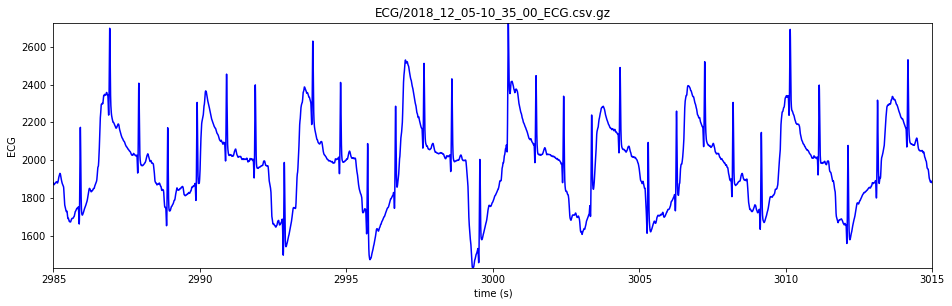

In [166]:
offset = 3000 # seconds
window = 30 # seconds

plt.clf() 
stress.plot_ecg(ecg, offset = offset, window = window)

plt.title(filename)
fig = plt.gcf()
fig.set_size_inches(15.75, 4.5)
plt.show()

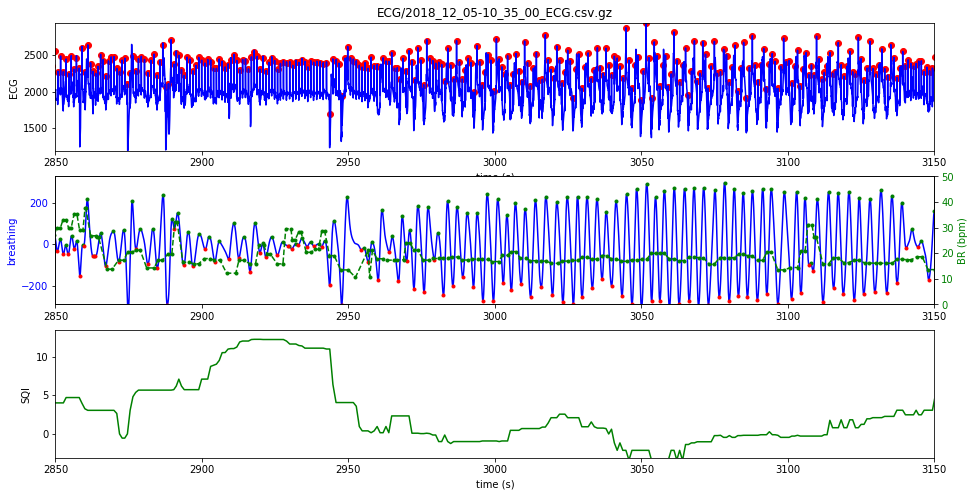

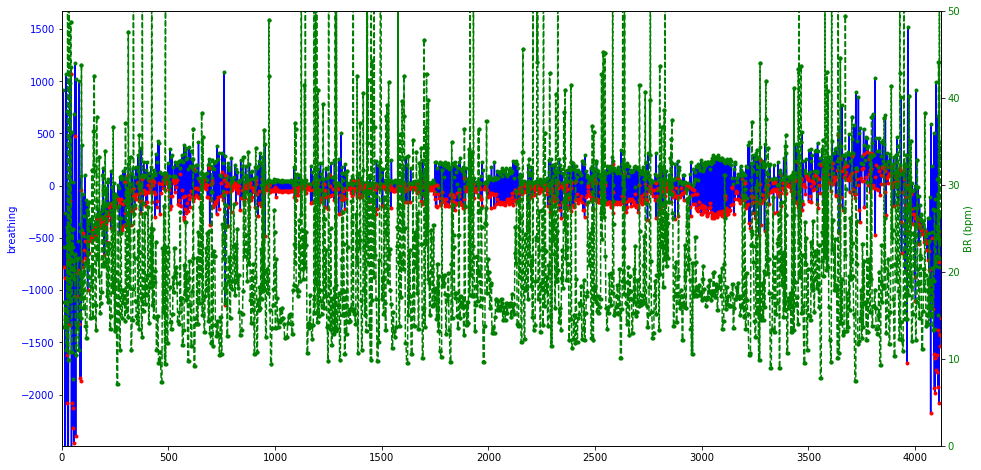

In [168]:
t_br, br, data = stress.calc_br_bpm(ecg)

# also calculate SQI ... how much do we trust the breathing rate?
qrs = stress.ecg_to_qrs(ecg)
sqi = stress.calc_hr_sqi(ecg, qrs)
t_qrs = [i/fs for i in qrs]

plt.clf()
plt.subplot(311)
stress.plot_ecg(ecg, qrs, offset=offset, window=window*10)

plt.title(filename)

ax = plt.subplot(312)
stress.plot_br_bpm(t_br, br, data, offset=offset, window=window*10)

ax = plt.subplot(313)
stress.plot_hr_sqi(t_qrs, sqi, offset=offset, window=window*10)

fig = plt.gcf()
fig.set_size_inches(15.75, 8)
plt.show()

plt.figure()
stress.plot_br_bpm(t_br, br, data)
fig = plt.gcf()
fig.set_size_inches(15.75, 8)
plt.show()
